In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/processed/data.csv')

In [3]:
df.head()

,model_name,model_year,kms_driven,owner,location,mileage,power,price
0,Yamaha SZR 150cc 2012,2012,34000.0,first,bengaluru,NaN,12.0,24000.0
1,Hero CD Dawn 100cc 2005,2005,28000.0,first,ghaziabad,72.0,7.0,10000.0
2,Bajaj Avenger Street 220 2017,2017,5947.0,first,chennai,53.0,19.0,80000.0
3,Jawa Standard 295CC Dual ABS BS6 2020,2020,2700.0,first,mumbai,NaN,27.0,160000.0
4,Hero Xpulse 200cc BS6 2021,2021,628.0,first,gwalior,46.4,17.8,110000.0


In [4]:
df.describe()

,model_year,kms_driven,mileage,power,price
count,4349.000000,3126.000000,3729.000000,4140.000000,4.348000e+03
mean,2015.778570,24981.737684,46.573913,18.576737,8.505120e+04
std,3.768599,31550.628098,16.010920,7.603788,7.664979e+04
min,1950.000000,4.000000,5.000000,7.000000,3.900000e+03
25%,2014.000000,10000.000000,35.000000,14.000000,4.400000e+04
50%,2017.000000,18000.000000,40.000000,18.700000,7.000000e+04
75%,2018.000000,30573.750000,59.000000,20.720000,1.155250e+05
max,2021.000000,1000000.000000,104.000000,139.000000,3.000000e+06


# Handle model_name

### There are too many models, let try to create a brand category using the model name.

In [5]:
df['brand'] = df['model_name'].apply(lambda x: ' '.join(x.split()[:1]))

In [6]:
df.sample(5)

,model_name,model_year,kms_driven,owner,location,mileage,power,price,brand
3542,Bajaj Pulsar 135LS 2016,2016,52000.0,first,mumbai,64.0,13.0,45000.0,Bajaj
4043,Bajaj Avenger Street 150 2017,2017,23250.0,first,bangalore,45.0,14.3,59800.0,Bajaj
3010,Royal Enfield Thunderbird 350cc 2017,2017,35000.0,first,kozhikode,40.0,19.8,131100.0,Royal
2518,Yamaha FZs 150cc 2014,2014,21000.0,first,delhi,45.0,13.0,38000.0,Yamaha
3577,Honda CB Shine 125cc 2019,2019,NaN,first,delhi,65.0,10.0,55000.0,Honda


In [7]:
df.brand.value_counts()

Bajaj               1221
Royal                938
Yamaha               478
Hero                 430
TVS                  405
Honda                319
KTM                  286
Suzuki               129
UM                    62
Jawa                  38
Mahindra              11
Harley-Davidson        8
Husqvarna              7
Hyosung                6
Benelli                3
Fb                     3
BenelliImperiale       2
Kawasaki               2
Aprilia                1
Name: brand, dtype: int64

### We can also extract the engine details as cc from model_name

In [8]:
import re
def extract_cc(val):
    match =  re.search(r"\d{2,}(cc)", val) 
    if match:
        return match.group().replace('cc','')
    else:
        return None
    

df['engine'] = df['model_name'].apply(extract_cc)

In [9]:
df.sample(5)

,model_name,model_year,kms_driven,owner,location,mileage,power,price,brand,engine
2888,Yamaha YZF-R15 V3 150CC ABS 2019,2019,8900.0,first,mumbai,NaN,18.70,145000.0,Yamaha,None
398,Bajaj Pulsar ABS 220F 2020,2020,95000.0,fourth,jaipur,38.0,21.00,48000.0,Bajaj,None
1465,Honda CD 110 Dream 2019,2019,NaN,first,jaipur,84.0,8.25,45000.0,Honda,None
1160,Royal Enfield Classic 500cc 2016,2016,9000.0,first,delhi,32.0,27.20,115000.0,Royal,500
168,Bajaj Pulsar 150cc 2014,2014,NaN,third,jaipur,65.0,14.85,27000.0,Bajaj,150


### We can now drop the model_name feature

In [10]:
df = df.drop('model_name',axis=1)

# Handle model_year

We can use model_year to calculate the age of the bike, Age might give us the better results or representation

In [11]:
from datetime import date
current_year = date.today().year

df['age'] = df.model_year.apply(lambda x: current_year - x if x else None )

### Let's drop the model_year

In [12]:
df = df.drop('model_year',axis=1)

# Handle kms_driven

### Missing values will be hanled latter

# Handle owner

In [13]:
# remove whitespace
df['owner'] = df.owner.str.strip()

In [14]:
df.owner.unique()

array(['first', 'second', 'fourth', 'third'], dtype=object)

In [15]:
print(df.owner.isnull().sum())

0


### Let's leave here only other things will handle during encoding

# Handle location

In [16]:
df.location.value_counts()[:10]

delhi         830
bangalore     475
mumbai        429
jaipur        258
pune          199
hyderabad     180
ahmedabad     158
gurgaon       149
chennai       119
chandigarh     94
Name: location, dtype: int64

## Let's take only top 5 locations and make other as 'others'

In [17]:
top_locations = df.location.value_counts().index[:5]
print(top_locations)

Index(['delhi', 'bangalore', 'mumbai', 'jaipur', 'pune'], dtype='object')


In [18]:
df['location'] = df.location.apply(lambda x: x if x in top_locations else 'other')

# Handle mileage

### Nothing to do much here,missing values will be handle latter

# Handle power

### Nothing to do much here,missing values will be handle latter

# Handle brand

In [19]:
# Let's check how may brands we get
print('Unique Brands :',len(df['brand'].unique()))
df['brand'].value_counts()[:10]

Unique Brands : 19


Bajaj     1221
Royal      938
Yamaha     478
Hero       430
TVS        405
Honda      319
KTM        286
Suzuki     129
UM          62
Jawa        38
Name: brand, dtype: int64

### Let's take only top 10 brands as our base brand & make other as 'other' category

In [20]:
top_brands = df['brand'].value_counts().index[:10]
df['brand'] = df['brand'].apply(lambda x: x if x in top_brands else 'other')

### Let's change the 'Royal' to 'Royal Enfield' as the actual brand

In [21]:
df['brand'] = df.brand.str.replace('Royal','Royal Enfield')

# Reorder the columns

In [22]:
# new_order = ['brand','model_year','kms_driven','owner','location','price']
# new_order = [6,0,1,2,3,4,6,7,8,5]
# df = df[df.columns[new_order]]

In [23]:
df.sample(4)

,kms_driven,owner,location,mileage,power,price,brand,engine,age
979,7600.0,first,other,53.0,19.0,75800.0,Bajaj,None,3
657,NaN,first,other,65.0,10.0,35000.0,Honda,125,7
3964,NaN,first,other,65.0,15.0,70000.0,Bajaj,150,3
4030,4476.0,first,other,38.0,21.0,94000.0,Bajaj,None,1


# Outlier Detection

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4349 entries, 0 to 4348
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   kms_driven  3126 non-null   float64
 1   owner       4349 non-null   object 
 2   location    4349 non-null   object 
 3   mileage     3729 non-null   float64
 4   power       4140 non-null   float64
 5   price       4348 non-null   float64
 6   brand       4349 non-null   object 
 7   engine      3198 non-null   object 
 8   age         4349 non-null   int64  
dtypes: float64(4), int64(1), object(4)
memory usage: 305.9+ KB


In [25]:
def box_plot(df):
    numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
    # outlier detection using boxplot
    plt.figure(figsize=(16,22))

    for i, variable in enumerate(numeric_columns):
        plt.subplot(5,4,i+1)
        plt.boxplot(df[variable],whis=1.5)
        plt.tight_layout()
        plt.title(variable)

    plt.show()

# box_plot(df)

## kms_driven

In [26]:
max_val = df['kms_driven'].quantile(.97)

min_val = df['kms_driven'].quantile(.1)

df = df[(df['kms_driven'] <= max_val) & (df['kms_driven'] > min_val)]

<AxesSubplot:>

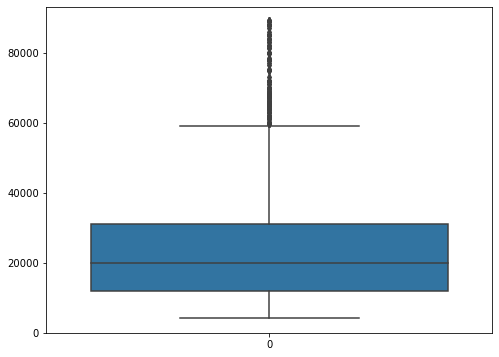

In [27]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df['kms_driven'])

## Mileage

In [28]:
max_val = df['mileage'].quantile(.99)

min_val = df['mileage'].quantile(.1)

df = df[(df['mileage'] <= max_val) & (df['mileage'] > min_val)]

<AxesSubplot:ylabel='mileage'>

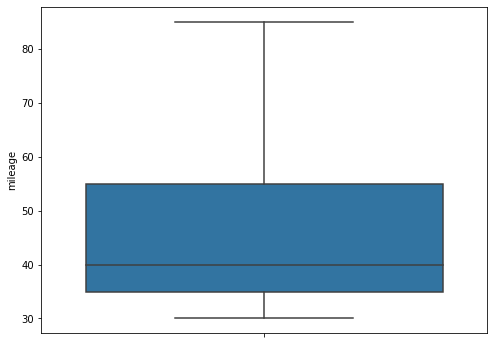

In [29]:
plt.figure(figsize=(8,6))
sns.boxplot(y=df['mileage'])

## Power

<AxesSubplot:ylabel='power'>

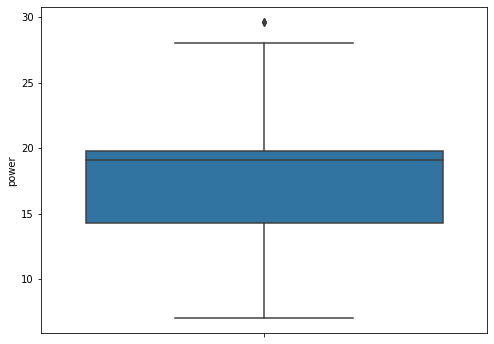

In [30]:
plt.figure(figsize=(8,6))
sns.boxplot(y=df['power'])

## Age

<AxesSubplot:ylabel='age'>

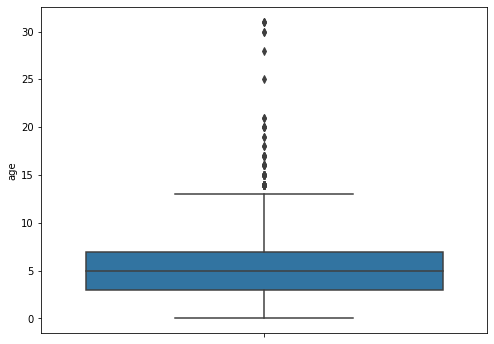

In [31]:
plt.figure(figsize=(8,6))
sns.boxplot(y=df['age'])

### More than 20 years old bikes are not that much good enough to be bought by anyone,let's take only age upto 20 years.

In [32]:
df.sample(3)

,kms_driven,owner,location,mileage,power,price,brand,engine,age
1588,11820.0,first,bangalore,35.0,27.2,158000.0,Royal Enfield,500,3
2263,24528.0,first,delhi,42.0,16.7,72000.0,Yamaha,150,5
3271,12000.0,first,other,40.0,19.8,105000.0,Royal Enfield,350,4


In [33]:
df = df[df['age'] <= 20]

In [34]:
df.sample(3)

,kms_driven,owner,location,mileage,power,price,brand,engine,age
2466,15000.0,first,pune,35.0,19.8,126600.0,Royal Enfield,350,3
1405,45000.0,first,other,65.0,15.0,25000.0,Bajaj,180,11
1506,23000.0,first,bangalore,37.0,19.8,125000.0,Royal Enfield,350,5


<AxesSubplot:ylabel='age'>

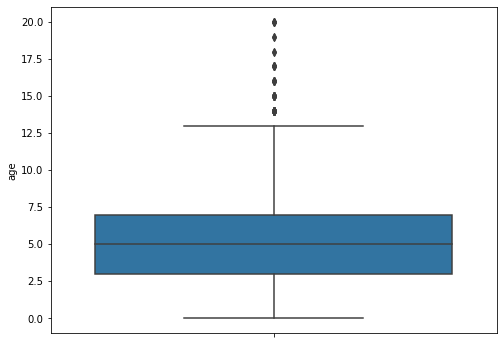

In [35]:
plt.figure(figsize=(8,6))
sns.boxplot(y=df['age'])

## Price

In [36]:
max_val = df['price'].quantile(.99)

min_val = df['price'].quantile(.1)

df = df[(df['price'] <= max_val) & (df['price'] > min_val)]

<AxesSubplot:ylabel='price'>

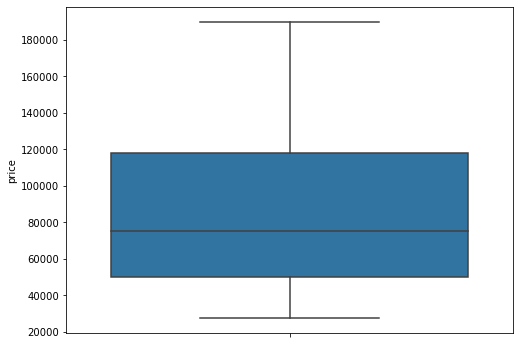

In [37]:
plt.figure(figsize=(8,6))
sns.boxplot(y=df['price'])

In [38]:
df.sample(5)

,kms_driven,owner,location,mileage,power,price,brand,engine,age
3407,31945.0,first,other,59.0,8.5,32000.0,Suzuki,125,7
860,23915.0,first,pune,65.0,7.0,50000.0,Hero,100,5
1466,8600.0,third,other,35.0,24.8,95000.0,UM,None,2
3547,5000.0,first,jaipur,35.0,19.0,100000.0,Bajaj,None,2
3440,31000.0,first,other,40.0,19.8,105000.0,Royal Enfield,350,6


In [39]:
df.shape

(1833, 9)

In [40]:
## Save the processed data
df.to_csv('../data/processed/processed.csv',index=False)